<a href="https://colab.research.google.com/github/deqiangwang123/3253-Machine-Learning/blob/main/W5_Homework_Deqiang1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment for Module 5, Training Models

In this assignment you will train different models on a given data set, and find the one that performs best

## Getting the data for the assignment (similar to the notebook from chapter 2 of Hands-On...)

In [ ]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
housing = load_housing_data()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Fix the categories in the categorical variable

In [ ]:
d = {'<1H OCEAN':'LESS_1H_OCEAN', 'INLAND':'INLAND', 'ISLAND':'ISLAND', 'NEAR BAY':'NEAR_BAY', 'NEAR OCEAN':'NEAR_OCEAN'}
# add understore
housing['ocean_proximity'] = housing['ocean_proximity'].map(lambda s: d[s])

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing['ocean_proximity'].value_counts()

LESS_1H_OCEAN    9136
INLAND           6551
NEAR_OCEAN       2658
NEAR_BAY         2290
ISLAND              5
Name: ocean_proximity, dtype: int64

In [ ]:
list(housing)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

### Add 2 more features

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["population_per_household"]=housing["population"]/housing["households"]

### Fix missing data

In [ ]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True) 

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  population_per_household  20640 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.9+ MB


### Seperate Num and Cat Data

In [ ]:
housing_num = housing.drop(['ocean_proximity', 'median_house_value'],axis=1)
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   rooms_per_household       20640 non-null  float64
 9   population_per_household  20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ocean_proximity  20640 non-null  object
dtypes: object(1)
memory usage: 161.4+ KB


# ASSIGNMENT

## 1, Partition into train and test

Use train_test_split from sklearn.model_selection to partition the dataset into 70% for training and 30% for testing.

You can use the 70% for training set as both training and validation by using cross-validation.


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.3, random_state=42)
len(train_set), len(test_set)

(14448, 6192)

### Seperate features and target attribute

In [ ]:
target = 'median_house_value'
features = list(train_set.columns)
features = [f for f in features if f!=target]
num_attribs = list(housing_num)
cat_attribs = list(housing_cat)

In [ ]:
cat_attribs, num_attribs

(['ocean_proximity'],
 ['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'rooms_per_household',
  'population_per_household'])

In [ ]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'rooms_per_household',
 'population_per_household']

In [ ]:
X_tr = train_set[features]
y_tr = train_set[[target]]

X_te = test_set[features]
y_te = test_set[[target]]

In [ ]:
X_tr.shape, X_te.shape

((14448, 11), (6192, 11))

## 2, Pipeline

### Polynomial transformations

Use PolynomialFeatures from sklearn.preprocessing

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Pipeline for numerical attributes
num_pipeline = Pipeline([
                    ('poly', PolynomialFeatures(2)),
                    ('std_scaler', StandardScaler()),     
                         ])

In [ ]:
full_pipeline = ColumnTransformer([
                      ("num", num_pipeline, num_attribs),
                      ("cat", OneHotEncoder(), cat_attribs),
])

In [ ]:
full_pipeline.fit(X_tr)
X_tr = full_pipeline.transform(X_tr)
X_te = full_pipeline.transform(X_te)

In [ ]:
X_tr.shape

(14448, 71)

In [ ]:
X_tr[0]

array([ 0.        ,  0.78093406, -0.80568191,  0.50935748, -0.11324158,
       -0.33786962, -0.18411678, -0.24350772,  0.13350629,  0.18106017,
       -0.01082519, -0.78231095,  0.81151785, -0.46842888,  0.12762338,
        0.35068519,  0.19745308,  0.25737763, -0.10463578, -0.14910009,
        0.01379088, -0.80479117,  0.36933251, -0.16630108, -0.3837055 ,
       -0.23282934, -0.29327224,  0.03352756,  0.05478907, -0.02132185,
        0.33169874,  0.43187009,  0.02185844,  0.23634454,  0.16177501,
        0.48962769,  0.64378568,  0.02317349, -0.16876077, -0.2110604 ,
       -0.15912514, -0.19491735, -0.09024508, -0.05922008, -0.05916189,
       -0.2562883 , -0.20236516, -0.24229442, -0.21541687, -0.20842917,
       -0.27936028, -0.12576665, -0.18671706, -0.09160096, -0.05916189,
       -0.02193947, -0.22712742, -0.13965837, -0.11324158, -0.18411678,
       -0.07213562,  0.09785241, -0.00303904, -0.00526963,  0.01255395,
       -0.01150612,  0.        ,  0.        ,  1.        ,  0.  

## 3, Linear regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())

In [ ]:
from sklearn.linear_model import LinearRegression
lin_pipeline_scores = cross_val_score(LinearRegression(), X_tr, y_tr, scoring="neg_mean_squared_error", cv=4)
lin__pipeline_rmse_scores = np.sqrt(-lin_pipeline_scores)
display_scores(lin__pipeline_rmse_scores)

Scores: [ 95630.66056065 579933.9732373  159281.01228923  85519.19265028]
Mean: 230091.20968436403


If the error on the cross-validation is too high it is because the model is over-fitting. Regularization is needed.

## 4, Ridge regression

In [ ]:
from sklearn.linear_model import Ridge
param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000,1000]}]
grid_search_rr = GridSearchCV(Ridge(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_rr.fit(X_tr, y_tr)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]}],
             scoring='neg_mean_squared_error')

In [ ]:
print(grid_search_rr.best_params_)
print(np.sqrt(-grid_search_rr.best_score_))

{'alpha': 100}
66871.4254948038


## 5, Lasso regression

Now do the same as in 6 but with Lasso

In [ ]:
from sklearn.linear_model import Lasso
param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000,1000]}]
grid_search_lr = GridSearchCV(Lasso(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_tr, y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.944e+13, tolerance: 1.292e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.959e+13, tolerance: 1.290e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]}],
             scoring='neg_mean_squared_error')

In [ ]:
print(grid_search_lr.best_params_)
print(np.sqrt(-grid_search_lr.best_score_))

{'alpha': 1000}
66932.5236818049


## 6, Elastic Net regression

Do the same as in 6 and 7, but now with Elastic Net. However, the grid search should be over the parameters alpha and  l 1ratio. Use just 3 values for l1_ratio.

In [ ]:
from sklearn.linear_model import ElasticNet
param_grid_en = [{'alpha': [0.001,0.01,0.1,1,10,100,1000,1000],
                  'l1_ratio': [0.2,0.4,0.6]}]
grid_search_en = GridSearchCV(ElasticNet(), param_grid_en, cv=3, scoring='neg_mean_squared_error')
grid_search_en.fit(X_tr, y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.968e+13, tolerance: 1.292e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.006e+13, tolerance: 1.290e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             scoring='neg_mean_squared_error')

In [ ]:
print(grid_search_en.best_params_)
print(np.sqrt(-grid_search_en.best_score_))

{'alpha': 0.1, 'l1_ratio': 0.6}
66585.91882662932


### Learning curve

In [ ]:
from sklearn.metrics import mean_squared_error

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
  train_scores, val_scores = [], []
  for m in range(1, len(X_train),100):
    model.fit(X_train[:m], y_train[:m])
    y_train_perdict = model.predict(X_train[:m])
    y_val_perdict = model.predict(X_val[:m])
    train_scores.append(mean_squared_error(y_train[:m], y_train_perdict))
    val_scores.append(mean_squared_error(y_val[:m], y_val_perdict))
  plt.plot(np.sqrt(train_scores), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_scores), "b-", linewidth=3, label="val")
  plt.legend(loc="upper right", fontsize=14)   # not shown in the book
  plt.xlabel("Training set size", fontsize=14) # not shown
  plt.ylabel("RMSE", fontsize=14)              # not shown

In [ ]:
import warnings
warnings.filterwarnings('ignore')

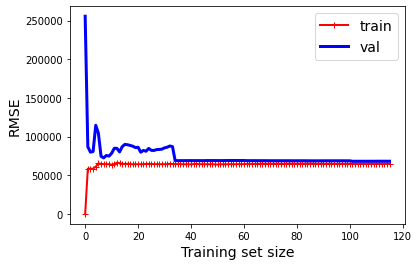

In [ ]:
plot_learning_curves(grid_search_en.best_estimator_ , X_tr, y_tr)

From the learning curve, it looks like a underfitting. Both train and val ends up with a plateau and clos to each other. And error is high.

## 7, Evaluating your best model on TESTING data

Choose among grid_search_rr, grid_search_lr, and grid_search_enr, the model with best performance

In [ ]:
from sklearn.metrics import mean_squared_error

final_model = grid_search_en.best_estimator_   ## grid_search SHOULD BE THE BEST GRID SEARCH ##

y_te_estimation = final_model.predict(X_te)

final_mse = mean_squared_error(y_te, y_te_estimation)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

66708.30145834081


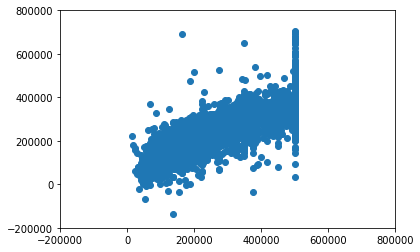

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=y_te, y=y_te_estimation)
plt.xlim([-200000,800000])
plt.ylim([-200000,800000])
plt.show()

## 8, Batch Gradient Descent
Seems like the one hot attributes make the matrix singular for Normal Equation so try Batch Gradient Descent.

In [ ]:
def batch_gradient_descent(theta, eta, n_iteration, X, y):
  m = len(X)
  for iteration in range(n_iteration):
    gradients = 2/m * X.T.dot(X.dot(theta) - y)
    theta = theta - eta * gradients
  return theta

In [ ]:
np.random.seed(42)
theta_init = np.random.randn(X_tr.shape[1], 1)
theta = batch_gradient_descent(theta=theta_init, eta=0.1, n_iteration=1000, X=X_tr, y=y_tr)

Evaluation the RMSE of the prediction from BGD

In [ ]:
y_predict_bgd = X_te.dot(theta)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_te, y_predict_bgd)

ValueError: ignored

In [ ]:
y_predict_bgd

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

## 9, Stochastic Gradient Desent

### No regulation

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=5000, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
# sgd_reg.fit(X_tr, y_tr)

In [ ]:
SGD_scores = cross_val_score(sgd_reg, X_tr, y_tr, scoring="neg_mean_squared_error", cv=4)
SGD_rmse_scores = np.sqrt(-SGD_scores)
display_scores(SGD_rmse_scores)

Scores: [1.48091787e+11 2.16288154e+11 2.08478410e+11 1.72610535e+11]
Mean: 186367221413.466


### Learning schedule

In [ ]:
sgd_reg = SGDRegressor(max_iter=5000, tol=-np.infty, penalty=None, learning_rate='optimal', random_state=42)
SGD_scores = cross_val_score(sgd_reg, X_tr, y_tr, scoring="neg_mean_squared_error", cv=4)
SGD_rmse_scores = np.sqrt(-SGD_scores)
display_scores(SGD_rmse_scores)

Scores: [1.96505598e+11 2.55167536e+11 1.09369742e+11 2.84768308e+11]
Mean: 211452796049.18747


### Try l1 and l2 regulation

In [ ]:
sgd_reg = SGDRegressor(max_iter=5000, tol=-np.infty, penalty='l1', alpha=100,learning_rate='optimal', random_state=42)
SGD_scores = cross_val_score(sgd_reg, X_tr, y_tr, scoring="neg_mean_squared_error", cv=4)
SGD_rmse_scores = np.sqrt(-SGD_scores)
display_scores(SGD_rmse_scores)

Scores: [200849.08576723 217986.27026255 213239.4605119  278355.72606384]
Mean: 227607.63565137837


In [ ]:
sgd_reg = SGDRegressor(max_iter=5000, tol=-np.infty, penalty='l2', alpha=100,learning_rate='optimal', random_state=42)
SGD_scores = cross_val_score(sgd_reg, X_tr, y_tr, scoring="neg_mean_squared_error", cv=4)
SGD_rmse_scores = np.sqrt(-SGD_scores)
display_scores(SGD_rmse_scores)

Scores: [172683.58332807 166287.4941596  163716.88794189 163602.31758537]
Mean: 166572.57075373546


### Early stopping

In [ ]:
sgd_reg = SGDRegressor(max_iter=5000, tol=-np.infty, penalty='l2', alpha=100,learning_rate='optimal', early_stopping=True, warm_start=True,random_state=42)
SGD_scores = cross_val_score(sgd_reg, X_tr, y_tr, scoring="neg_mean_squared_error", cv=4)
SGD_rmse_scores = np.sqrt(-SGD_scores)
display_scores(SGD_rmse_scores)

Scores: [172737.62734721 166331.00765308 164027.23126409 163944.24049116]
Mean: 166760.0266888839


Improve a little bit but not too much.

### Only Early stopping

In [ ]:
sgd_reg = SGDRegressor(max_iter=5000, tol=-np.infty, learning_rate='optimal', early_stopping=True, random_state=42)
SGD_scores = cross_val_score(sgd_reg, X_tr, y_tr, scoring="neg_mean_squared_error", cv=4)
SGD_rmse_scores = np.sqrt(-SGD_scores)
display_scores(SGD_rmse_scores)

Scores: [3.69259175e+10 2.74473939e+10 5.94956899e+10 3.86633572e+10]
Mean: 40633089631.87039


In [ ]:
sgd_reg = SGDRegressor(max_iter=100, learning_rate='optimal', early_stopping=True, eta0=0.0005,random_state=42)
SGD_scores = cross_val_score(sgd_reg, X_tr, y_tr, scoring="neg_mean_squared_error", cv=4)
SGD_rmse_scores = np.sqrt(-SGD_scores)
display_scores(SGD_rmse_scores)

Scores: [6.30177484e+12 1.15934424e+13 8.99091407e+13 6.34658517e+12]
Mean: 28537735763938.613


Try Warm start

In [ ]:
sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate='optimal',
                       random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=42)


Improve compared with original but l1 and l2 performs better.

##### YOUR ANSWER HERE 

#[Optional]
Why does the matrix X appears transponsed in the normal equation in the linear regression? Equation 4.4. Start from equation 4.3



#[Optional]
Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?



#[Optional]
Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?



#[Optional]
Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?



#[Optional]
Why does the matrix X appears transponsed in the normal equation in the linear regression? Equation 4.4. Start from equation 4.3

